<h1 style="text-align: center; font-size: 2.3em; color: navy; font-family: Arial, sans-serif; font-weight: bold;">
Astrophysical Techniques – Homework 2 
</h1>

<h2 style="text-align: center; font-size: 2em; color: black; font-family: Arial, sans-serif;">
Image Formation in a Telescope
</h2>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif;">
Master in Astrophysics and Space Science (MASS)-(2024/2025) <br>
Department of Astronomy, University of Belgrade <br>
Instructor: Prof. Dragana Ilić
</p>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif; font-style: italic;">
Report by Nandita Das
</p>

<div align="center">
<h2>Abstract</h2>
</div>

*This project explores image formation in telescopes through computational simulations, emphasizing the Point Spread Function (PSF) and how it changes under various conditions. We investigate the effects of different aperture shapes and introduce optical aberrations using Zernike polynomials, analyzing their impact on the PSF. Additionally, the influence of central obstructions, representing secondary mirrors, is examined to show how they alter image clarity and intensity distribution. These tasks come together to provide a clearer understanding of how telescopes capture and render celestial objects, giving insight into both ideal and real-world imaging challenges.*

# Task 1

### Point Spread Function and Diffraction Patterns

In an ideal optical system without aberrations, the image of a point source is not a single point but rather a pattern of energy distribution. This pattern consists of a bright central disc surrounded by faint, concentric rings, known as the **Airy pattern**. The **Point Spread Function (PSF)** represents the normalized intensity distribution obtained from a point source, describing the two-dimensional distribution of light in the telescope's focal plane for astronomical point sources.

The PSF provides a detailed representation of how an optical system, such as a telescope, responds to a point source of light. Due to the diffraction of light passing through the aperture, the PSF illustrates the spread of light around a central peak. This function is essential for understanding the resolution and imaging performance of the telescope.

### Calculating the PSF for Different Apertures

The shape of the telescope aperture significantly influences the resulting PSF pattern. In this analysis, we compute the PSF for a circular aperture with various radii and extend our exploration to different aperture shapes, including square, hexagonal, and triangular apertures. By simulating these variations, we gain insights into how each aperture shape affects diffraction patterns and light distribution in the telescope’s focal plane.

### Mathematical Background of PSF Calculation

The PSF is mathematically defined by the square of the Fourier transform of the telescope aperture function  A(x, y), allowing us to understand how light is distributed in the telescope's image based on different aperture shapes:

$$
PSF = \left| \mathcal{F} \left( A(x, y) \right) \right|^2
$$

where:
- A(x, y) is the aperture function, representing the shape of the telescope's aperture.
- $\mathcal{F}$ denotes the Fourier transform operation.

This calculation enables us to visualize how a point source would appear in the telescope image with different aperture shapes. By altering the aperture shape to square, hexagonal, or triangular, we can observe distinct diffraction patterns, illustrating the effect of each shape on the PSF.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2
from scipy.signal import convolve2d

### Define Parameters

In [2]:
field_size = 256
radii = [128, 64, 32]
side_lengths = [128, 64, 32]

### Define Aperture Functions

#### Circular Aperture

In [3]:
""" Create a binary circular aperture"""

def circular_aperture(radius, field_size):
    y, x = np.indices((field_size, field_size)) - field_size // 2
    aperture = (x**2 + y**2) <= radius**2
    return aperture.astype(float)

#### Square Aperture

In [4]:
""" Create a binary square aperture"""

def square_aperture(side_length, field_size):
    aperture = np.zeros((field_size, field_size))
    x_start = field_size // 2 - side_length // 2
    x_end = field_size // 2 + side_length // 2
    y_start = field_size // 2 - side_length // 2
    y_end = field_size // 2 + side_length // 2
    aperture[y_start:y_end, x_start:x_end] = 1
    return aperture

#### Hexagonal Aperture

In [5]:
""" Create a binary hexagonal aperture """

def hexagonal_aperture(side_length, field_size):
    y, x = np.indices((field_size, field_size)) - field_size // 2
    height = np.sqrt(3) * side_length / 2
    aperture = np.abs(y) <= height
    aperture &= np.abs(x) <= side_length - np.abs(y) / np.sqrt(3)
    return aperture.astype(float)

#### Triangular Aperture

In [6]:
""" Create a binary equilateral triangular aperture """

def triangular_aperture(side_length, field_size):
    y, x = np.indices((field_size, field_size)) - field_size // 2
    h = np.sqrt(3) * side_length / 2  # Height of the equilateral triangle

# Conditions for the equilateral triangle
    aperture = (y >= -h / 2) & (y <= h / 2)  # y range between -h/2 and h/2
    aperture &= (x >= -side_length / 2 * (1 - (y + h / 2) / h)) & (x <= side_length / 2 * (1 - (y + h / 2) / h))

    return aperture.astype(float)
    

#### Function to Compute PSF Using FFT

In [7]:
""" Compute the PSF using FFT """

def compute_psf(aperture):
    fft_aperture = fftshift(fft2(aperture))
    psf = np.abs(fft_aperture)**2
    psf /= psf.max()  # Normalize
    return psf

### Plot Circular Apertures and PSFs

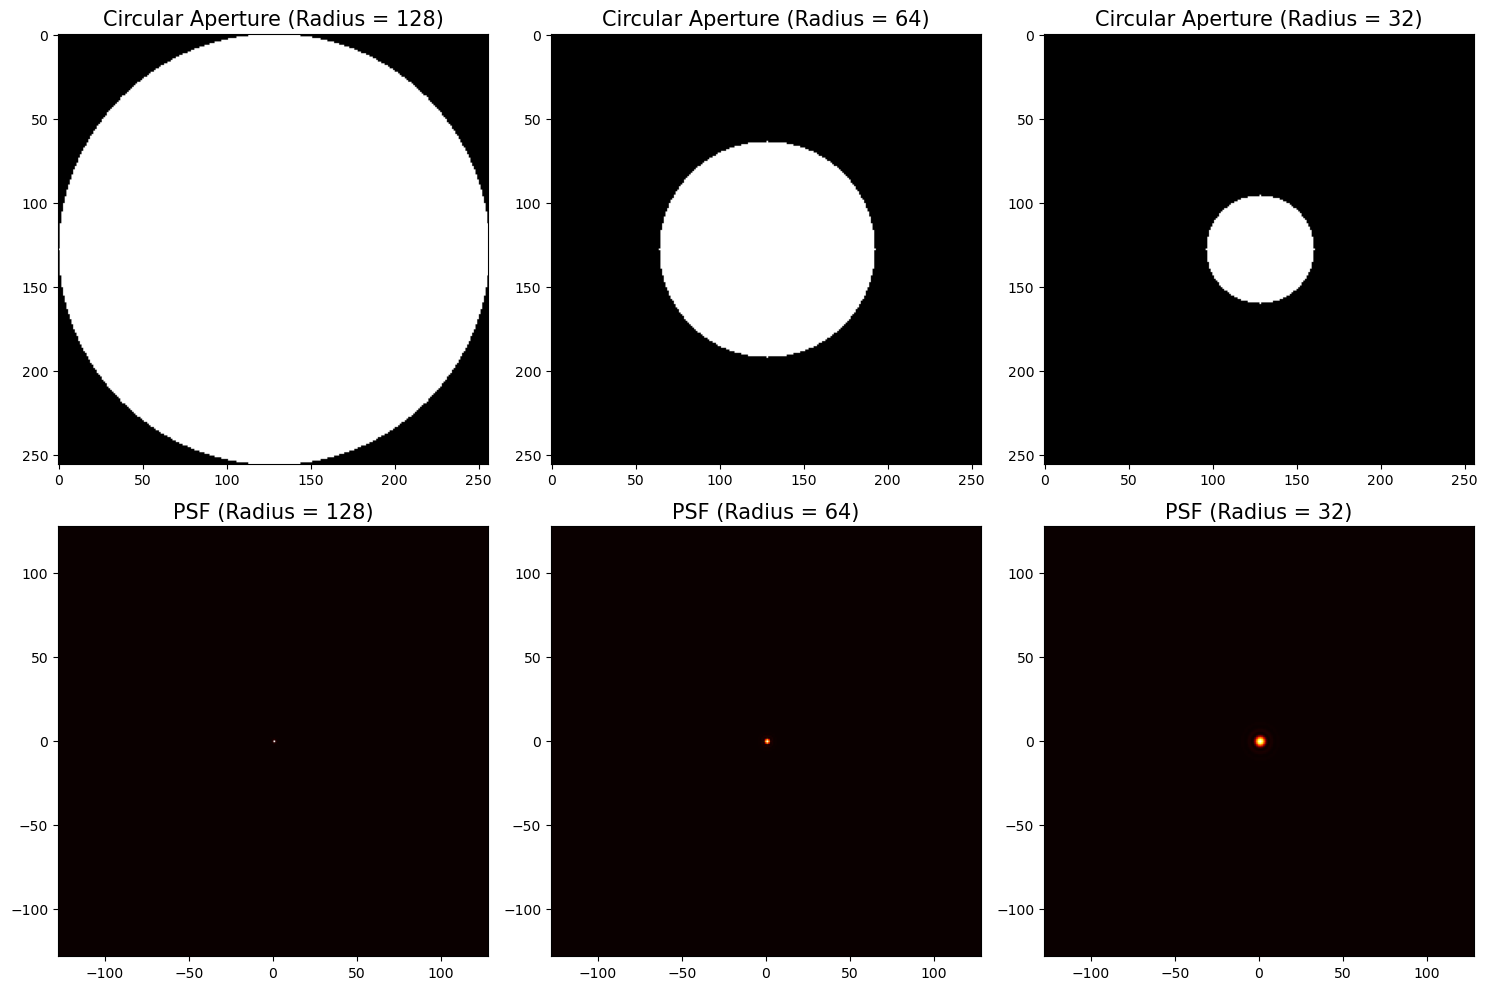

In [8]:
""" Create a figure for circular apertures and PSFs """

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, radius in enumerate(radii):
    aperture_image = circular_aperture(radius, field_size)
    psf = compute_psf(aperture_image)
    axes[0, i].imshow(aperture_image, cmap='gray')
    axes[0, i].set_title(f"Circular Aperture (Radius = {radius})", fontsize=15)
    axes[1, i].imshow(np.log1p(psf), cmap='hot', extent=[-128, 128, -128, 128])
    axes[1, i].set_title(f"PSF (Radius = {radius})", fontsize=15)
plt.tight_layout()
#plt.savefig("circular_apertures_psfs.png", dpi=300, bbox_inches='tight')
plt.show()


### Zoomed PSFs for Circular Apertures

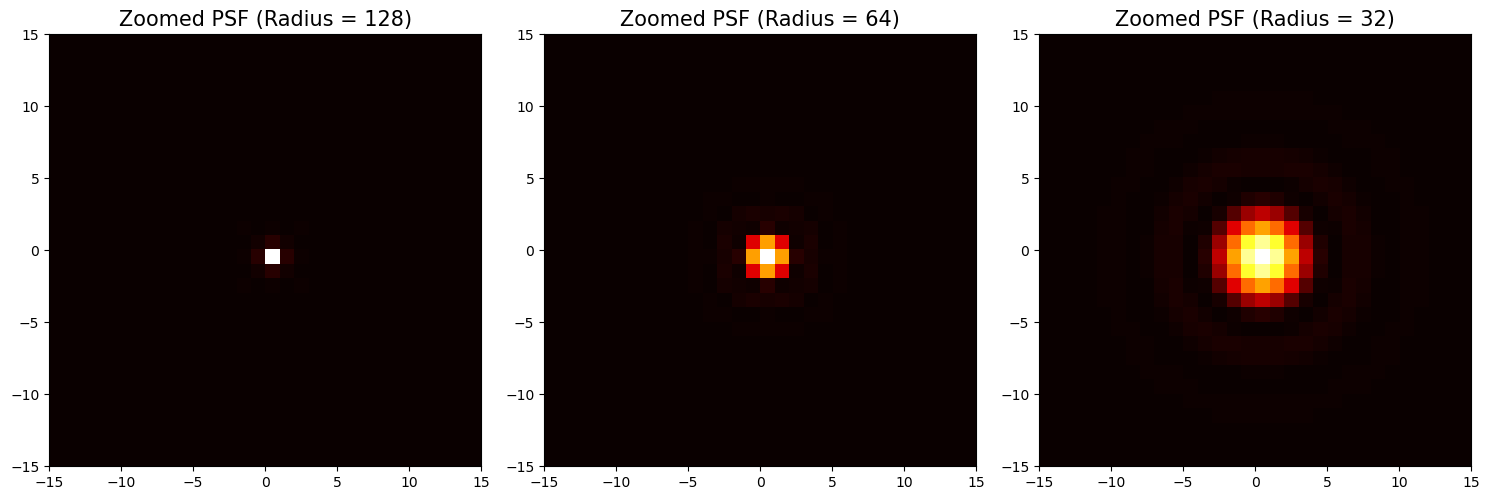

In [9]:
""" Create a figure for zoomed PSFs of circular apertures"""

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
zoom_level = 15  # Adjust the zoom level as needed

for i, radius in enumerate(radii):
    aperture_image = circular_aperture(radius, field_size)
    psf = compute_psf(aperture_image)
    axes[i].imshow(np.log1p(psf), cmap='hot', extent=[-field_size//2, field_size//2, -field_size//2, field_size//2])
    axes[i].set_xlim(-zoom_level, zoom_level)
    axes[i].set_ylim(-zoom_level, zoom_level)
    axes[i].set_title(f"Zoomed PSF (Radius = {radius})", fontsize=15)

plt.tight_layout()
#plt.savefig("zoomed_psfs.png", dpi=300, bbox_inches='tight') 
plt.show()

### Plot Square Apertures and PSFs

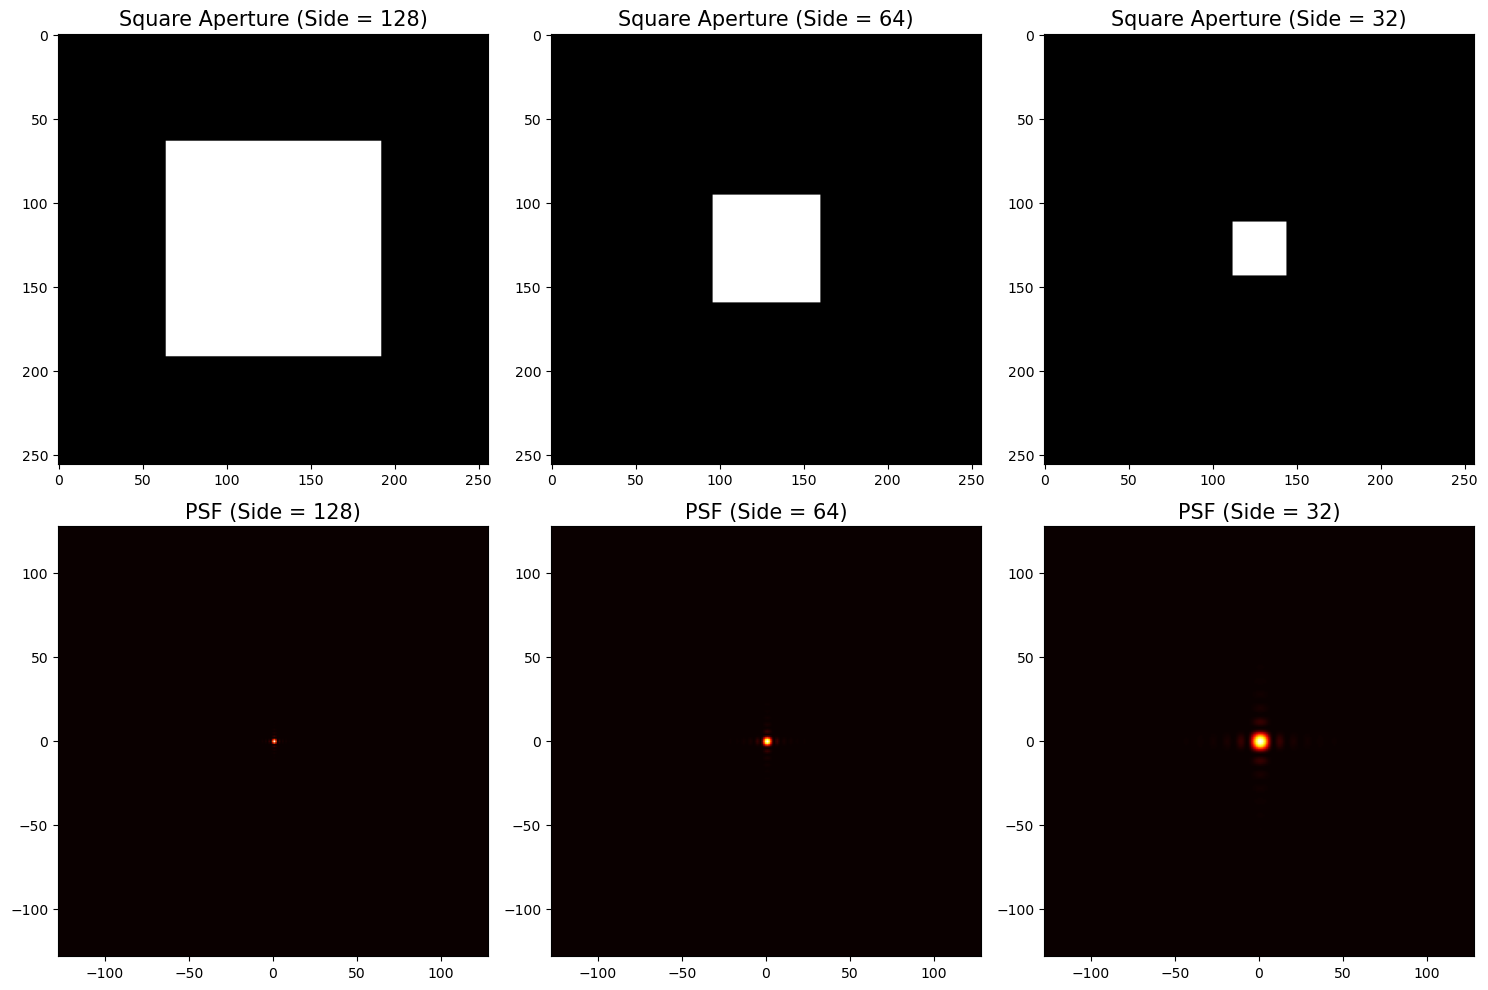

In [10]:
""" Create a figure for square apertures and PSFs """

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, side_length in enumerate(side_lengths):
    aperture_image = square_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[0, i].imshow(aperture_image, cmap='grey')
    axes[0, i].set_title(f"Square Aperture (Side = {side_length})", fontsize=15)
    axes[1, i].imshow(np.log1p(psf), cmap='hot', extent=[-128, 128, -128, 128])
    axes[1, i].set_title(f"PSF (Side = {side_length})", fontsize=15)
plt.tight_layout()
#plt.savefig("PSF.png", dpi=300, bbox_inches='tight')
plt.show()

### Zoomed PSFs for Square Apertures

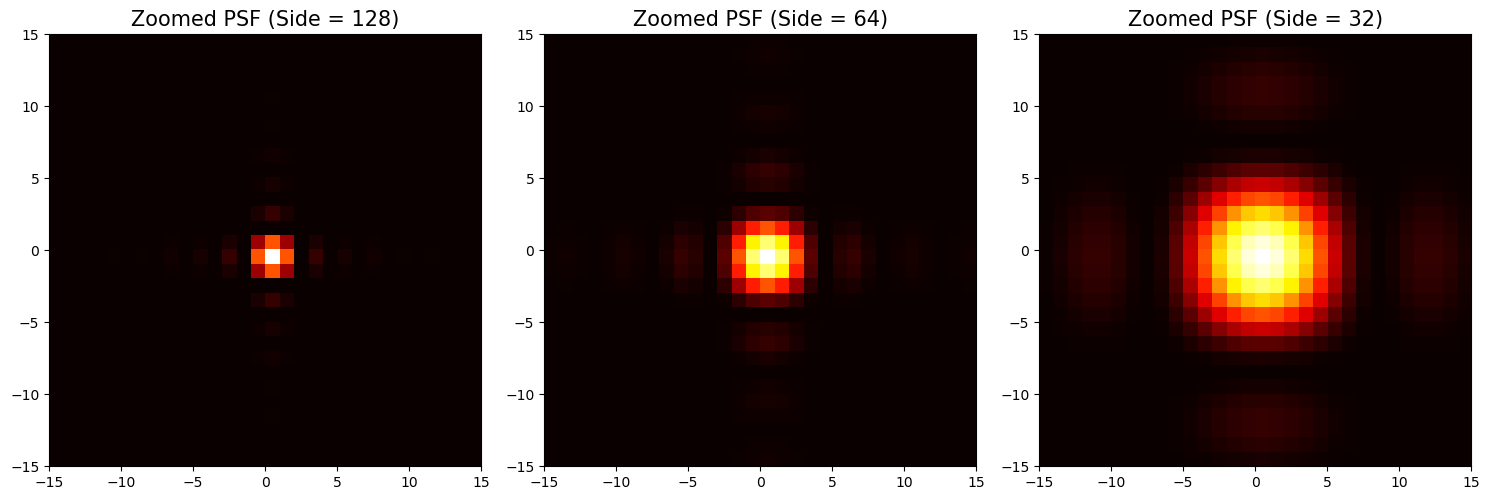

In [11]:
""" Create a figure for zoomed PSFs of square apertures """

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
zoom_level = 15  # Adjust the zoom level as needed

for i, side_length in enumerate(side_lengths):
    aperture_image = square_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[i].imshow(np.log1p(psf), cmap='hot', extent=[-field_size//2, field_size//2, -field_size//2, field_size//2])
    axes[i].set_xlim(-zoom_level, zoom_level)
    axes[i].set_ylim(-zoom_level, zoom_level)
    axes[i].set_title(f"Zoomed PSF (Side = {side_length})", fontsize=15)

plt.tight_layout()
#plt.savefig("Zoomed PSF.png", dpi=300, bbox_inches='tight')
plt.show()

### Plot Hexagonal Apertures and PSFs

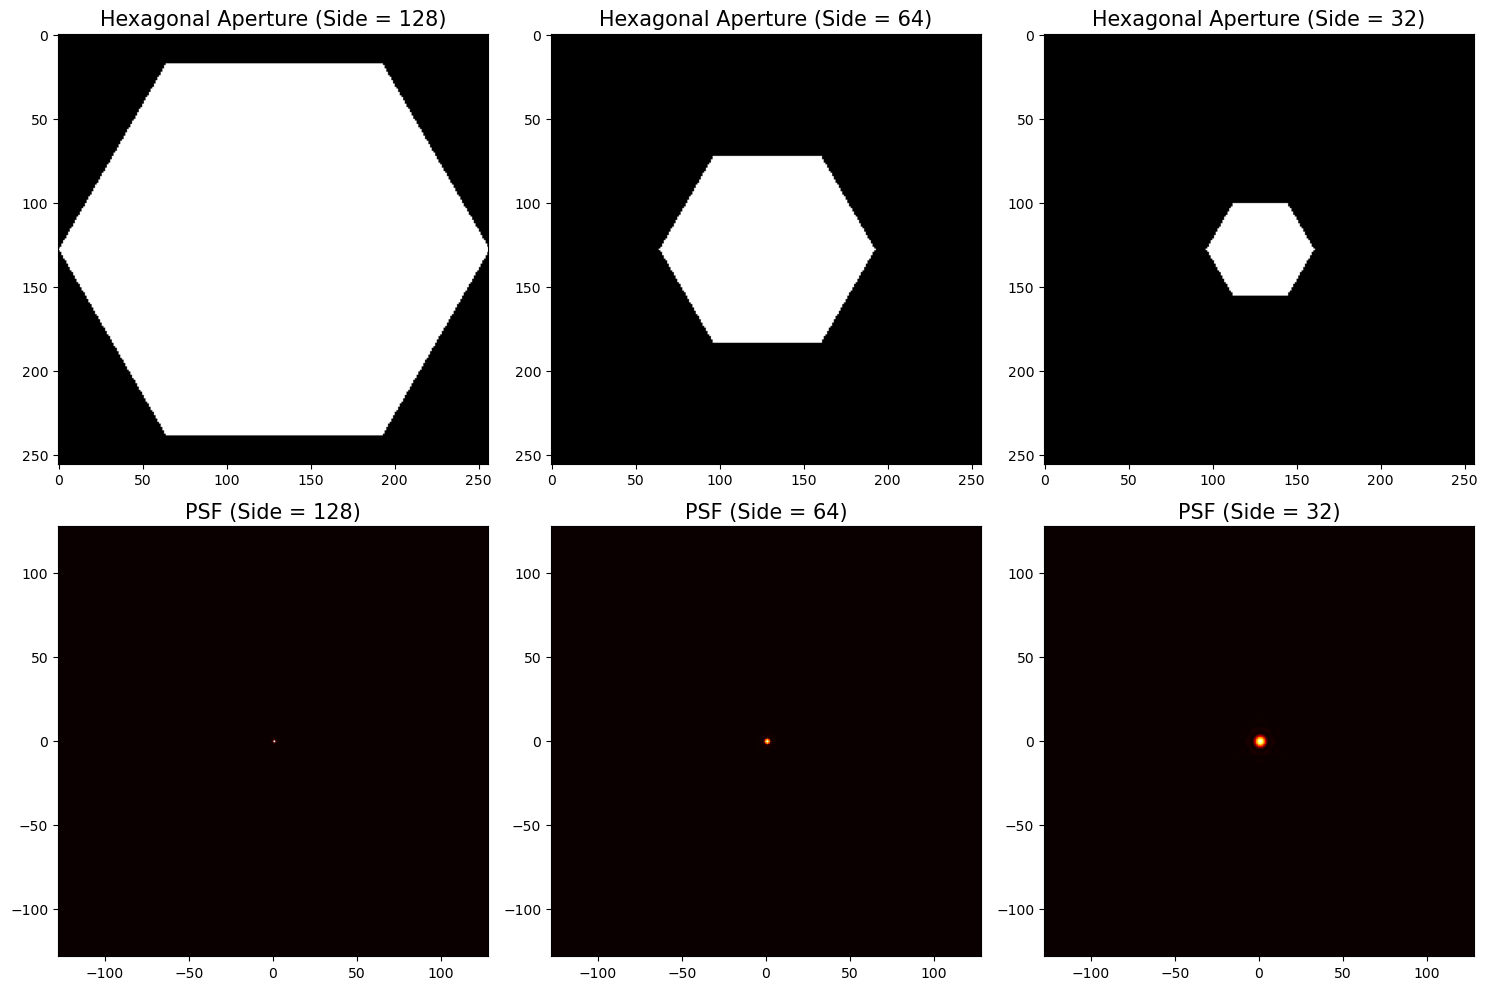

In [12]:
""" Create a figure for hexagonal apertures and PSFs """

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, side_length in enumerate(side_lengths):
    aperture_image = hexagonal_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[0, i].imshow(aperture_image, cmap='gray')
    axes[0, i].set_title(f"Hexagonal Aperture (Side = {side_length})", fontsize=15)
    axes[1, i].imshow(np.log1p(psf), cmap='hot', extent=[-128, 128, -128, 128])
    axes[1, i].set_title(f"PSF (Side = {side_length})", fontsize=15)
plt.tight_layout()
#plt.savefig("PSF.png", dpi=300, bbox_inches='tight')
plt.show()

### Zoomed PSFs for Hexagonal Apertures

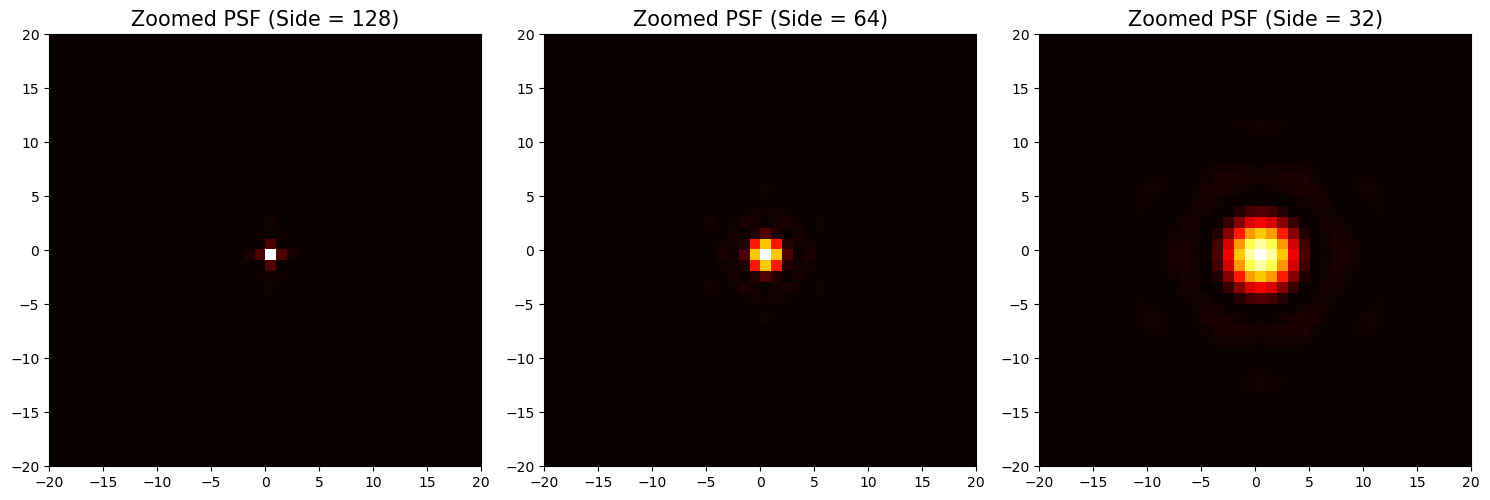

In [13]:
""" Create a figure for zoomed PSFs of hexagonal apertures """

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
zoom_level = 20  # Adjust the zoom level as needed

for i, side_length in enumerate(side_lengths):
    aperture_image = hexagonal_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[i].imshow(np.log1p(psf), cmap='hot', extent=[-field_size//2, field_size//2, -field_size//2, field_size//2])
    axes[i].set_xlim(-zoom_level, zoom_level)
    axes[i].set_ylim(-zoom_level, zoom_level)
    axes[i].set_title(f"Zoomed PSF (Side = {side_length})", fontsize=15)

plt.tight_layout()
#plt.savefig("Zoomed PSF.png", dpi=300, bbox_inches='tight')
plt.show()

### Plot Triangular Apertures and PSFs

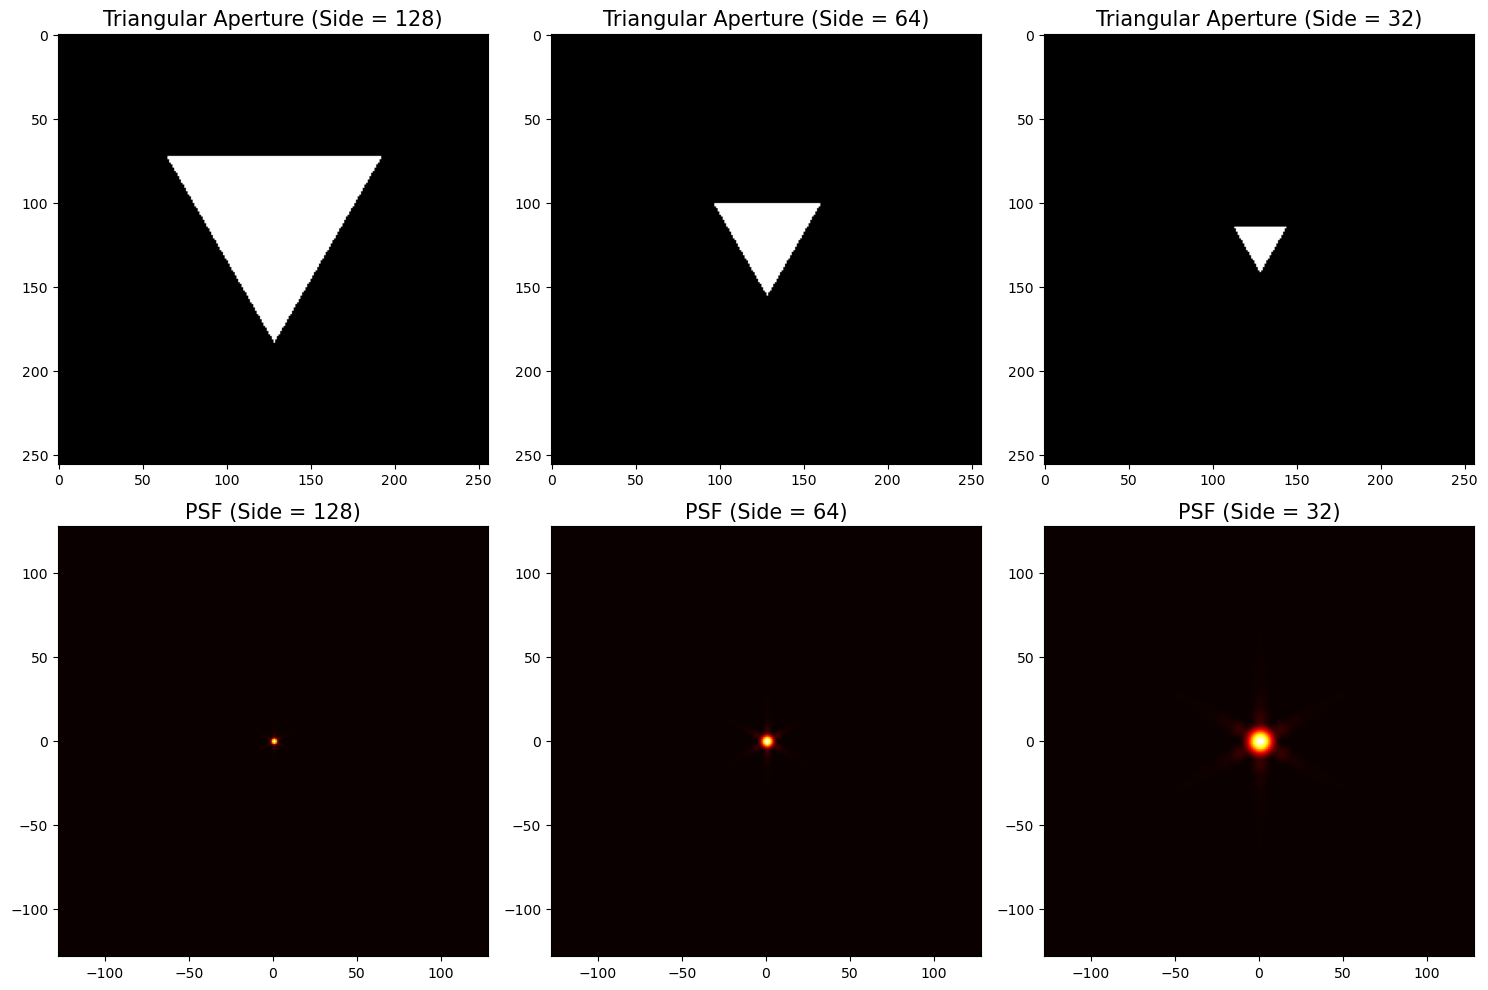

In [14]:
""" Create a figure for triangular apertures and PSFs """

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, side_length in enumerate(side_lengths):
    aperture_image = triangular_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[0, i].imshow(aperture_image, cmap='gray')
    axes[0, i].set_title(f"Triangular Aperture (Side = {side_length})", fontsize=15)
    axes[1, i].imshow(np.log1p(psf), cmap='hot', extent=[-128, 128, -128, 128])
    axes[1, i].set_title(f"PSF (Side = {side_length})", fontsize=15)
plt.tight_layout()
#plt.savefig("PSF.png", dpi=300, bbox_inches='tight')
plt.show()

### Zoomed PSFs for Triangular Apertures

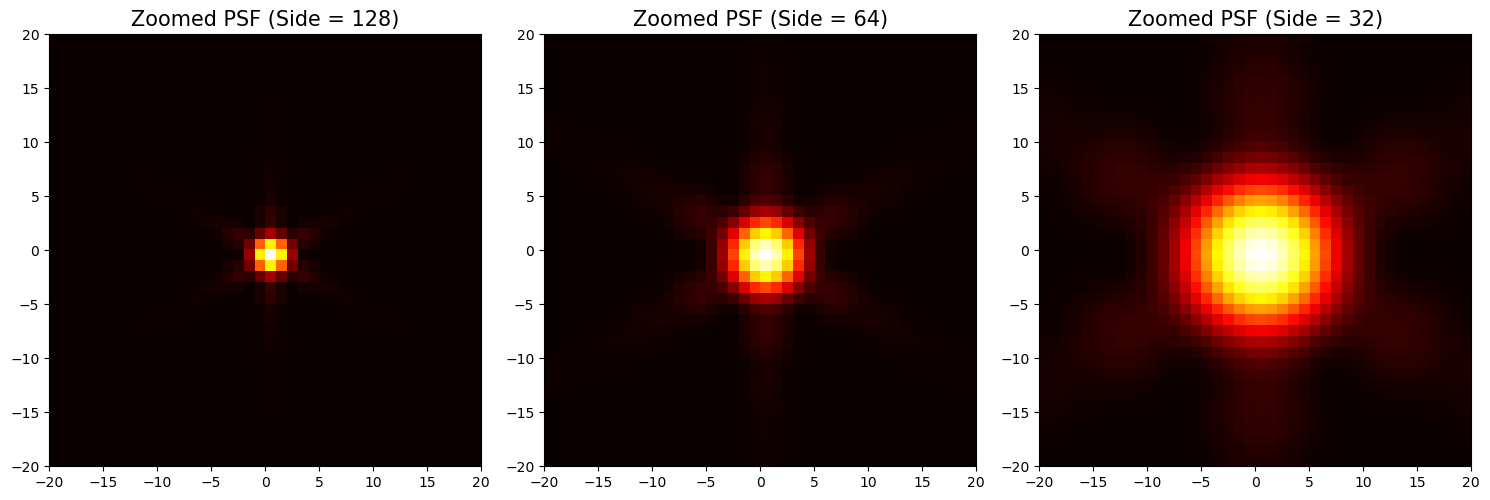

In [15]:
""" Create a figure for zoomed PSFs of triangular apertures """

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
zoom_level = 20  # Adjust the zoom level as needed

for i, side_length in enumerate(side_lengths):
    aperture_image = triangular_aperture(side_length, field_size)
    psf = compute_psf(aperture_image)
    axes[i].imshow(np.log1p(psf), cmap='hot', extent=[-field_size//2, field_size//2, -field_size//2, field_size//2])
    axes[i].set_xlim(-zoom_level, zoom_level)
    axes[i].set_ylim(-zoom_level, zoom_level)
    axes[i].set_title(f"Zoomed PSF (Side = {side_length})", fontsize=15)

plt.tight_layout()
#plt.savefig("Zoomed PSF.png", dpi=300, bbox_inches='tight')
plt.show()

# Task 2

### Image Formation and Convolution with the PSF

In astronomy, the image formation process for extended sources, such as galaxies or nebulae, can be modeled by considering the object as a composition of numerous point sources of light. Each point source generates a corresponding **Point Spread Function (PSF)** in the telescope's focal plane. When observing an extended object, the resulting image is essentially a combination, or convolution, of the object’s light distribution with the telescope’s PSF. 

The **convolution** operation mathematically overlays the object with the PSF at every point, producing the final observed image. This operation can be expressed as:

$$
I(x, y) = \left( O \ast PSF \right)(x, y)
$$

where:
- I(x, y) is the resulting intensity distribution observed in the telescope’s focal plane,
- Orepresents the light distribution of the object (e.g., a star, galaxy, or other astronomical sources),
- PSF denotes the Point Spread Function of the telescope, and
- \($\ast$\) indicates the convolution operation.

Since the PSF acts as a weighting function, it must be normalized to ensure that the overall intensity distribution remains accurate. By convolving the object with the PSF, we can simulate how the extended source would appear through the telescope.

Thus, the quality and appearance of the resulting image depend heavily on the PSF, which is influenced by factors such as the shape and size of the telescope aperture. For this task, we aim to produce images of idealized sources (e.g., modeled stars or galaxies) viewed through circular apertures, which will allow us to explore how aperture size and psf affects image quality.

### Define Point Source (Star/Galaxy)

In [16]:
"""Create an image of a point source as a narrow Gaussian profile"""

def point_source(field_size, intensity=1, sigma=1):
    y, x = np.indices((field_size, field_size))
    x0, y0 = field_size // 2, field_size // 2  # Center position
    source = intensity * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    return source

### Parameters

In [17]:
sigma_source = 1   # as preference, smaller better for pointlike source
radius = 64        # as preference

### Generate Source and Image

In [18]:
# defining image 
source_image = point_source(field_size, sigma=sigma_source)
aperture_image = circular_aperture(radius, field_size)

# Convolve the source image with the PSF
aperture_psf = compute_psf(aperture_image)
source_convolved = convolve2d(source_image, aperture_psf, mode='same', boundary='wrap')

### Simulate the Image

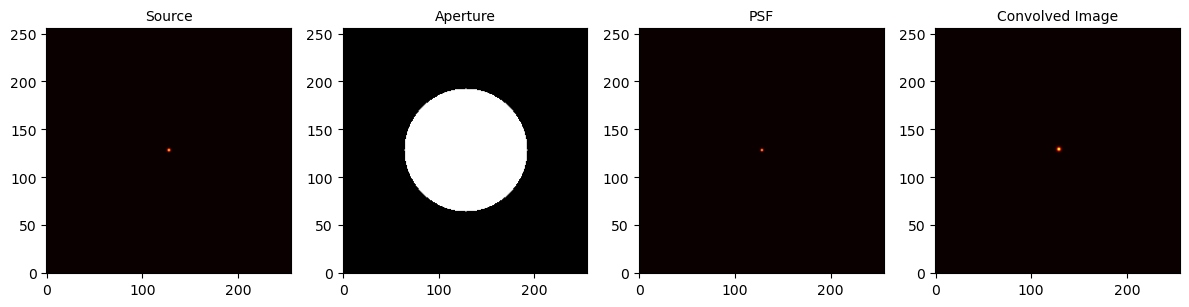

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Plot the source image
axes[0].imshow(source_image, cmap='hot', origin='lower')
axes[0].set_title("Source", fontsize=10)
axes[0].axis('on')

# Plot the aperture with clear visualization
aperture_image_normalized = aperture_image / np.max(aperture_image)
axes[1].imshow(aperture_image_normalized, cmap='gray', vmin=0, vmax=1, origin='lower')
axes[1].set_title("Aperture", fontsize=10)
axes[1].axis('on')

# Plot the PSF
axes[2].imshow(aperture_psf, cmap='hot', origin='lower')
axes[2].set_title("PSF", fontsize=10)
axes[2].axis('on')

# Plot the convolved image
axes[3].imshow(source_convolved, cmap='hot', origin='lower')
axes[3].set_title("Convolved Image", fontsize=10)
axes[3].axis('on')

plt.tight_layout()
#plt.savefig("ideal_source_image.png", dpi=300, bbox_inches='tight')
plt.show()

### Zooming to See Effect

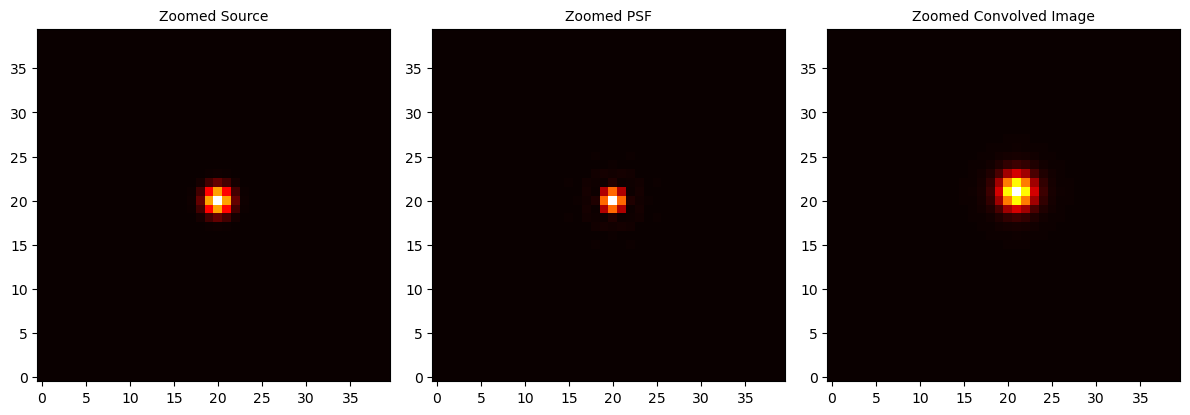

In [20]:
# Define a smaller zoom factor for a clearer effect
zoom_factor = 20  # adjust this number to zoom in or out

# Calculate the center point of the images
center = source_image.shape[0] // 2

# Zoom in on the images
source_zoomed = source_image[center - zoom_factor:center + zoom_factor,
                             center - zoom_factor:center + zoom_factor]
psf_zoomed = aperture_psf[center - zoom_factor:center + zoom_factor,
                          center - zoom_factor:center + zoom_factor]
convolved_zoomed = source_convolved[center - zoom_factor:center + zoom_factor,
                                    center - zoom_factor:center + zoom_factor]

# Plot the images side by side for easy comparison
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(source_zoomed, cmap='hot', origin='lower')
axes[0].set_title("Zoomed Source", fontsize=10)
axes[0].axis('on')

axes[1].imshow(psf_zoomed, cmap='hot', origin='lower')
axes[1].set_title("Zoomed PSF", fontsize=10)
axes[1].axis('on')

axes[2].imshow(convolved_zoomed, cmap='hot', origin='lower')
axes[2].set_title("Zoomed Convolved Image", fontsize=10)
axes[2].axis('on')

plt.tight_layout()
#plt.savefig("ideal_source_image_zoom.png", dpi=300, bbox_inches='tight')
plt.show()

# Wavefront Perturbations, Aberrations, and Zernike Polynomials

In a real optical system, the wavefront is rarely ideal. As light passes through the atmosphere and the telescope optics, it experiences various perturbations due to atmospheric turbulence, imperfections in optical elements, and other sources of aberrations. These perturbations cause deviations in the phase of the wavefront, affecting the Point Spread Function (PSF) and, ultimately, the quality of the image.

#### Aberrations and Wavefront Deformation

Aberrations refer to deviations from the ideal wavefront shape that an optical system aims to achieve. Common types of aberrations include defocus, coma, and astigmatism. These effects alter the phase of the wavefront at each point across the telescope’s aperture, causing a distorted image. The aberrated PSF can be expressed as:

$$
PSF = \left| \mathcal{F} \left( A(x, y) e^{i \Phi(x, y)} \right) \right|^2,
$$

where:
- A(x, y) is the aperture function.
- $\Phi(x, y)$ is the phase change introduced by aberrations at point \( (x, y) \) on the wavefront.

#### Zernike Polynomials

Zernike polynomials are a set of orthogonal polynomials defined on the unit circle that provide a powerful mathematical tool for describing wavefront aberrations. These polynomials allow us to represent different types of wavefront distortions in terms of a series expansion. Each Zernike polynomial corresponds to a specific type of aberration, and the phase change function $\Phi(x, y)$ can be expressed as a linear combination of these polynomials.

The general form of Zernike polynomials $Z_n^m(\rho, \phi)$, where n is the radial order and m is the azimuthal frequency, is given by:

$$
Z_n^m(\rho, \phi) = \sqrt{\frac{2(n + 1)}{1 + \delta_{0,m}}} \, R_n^m(\rho) \cdot
\begin{cases} 
\cos(m \phi), & m \geq 0 \\
\sin(m \phi), & m < 0 
\end{cases}
$$

where:
- $R_n^m(\rho)$ is the radial component of the Zernike polynomial.
- $\rho$ and $\phi$ are the radial and angular coordinates, respectively, on the unit circle.
- $\delta_{0,m}$ is the Kronecker delta, which accounts for normalization.

These polynomials satisfy the normalization condition:

$$
\int_0^{2\pi} \int_0^1 Z_n^m(\rho, \phi) \, \rho \, d\rho \, d\phi = \pi.
$$

Each aberration type corresponds to specific Zernike terms. For example, defocus, coma, and astigmatism are represented by certain low-order Zernike polynomials. The phase function $\Phi(x, y)$ can be modeled as a linear combination of Zernike polynomials, where each term in the series represents a particular aberration type.

This representation helps us understand and simulate how different types of aberrations affect the PSF and, consequently, the image quality. By adjusting the coefficients of the Zernike terms, we can simulate varying degrees of aberrations to observe their impact on the final image.

# Task 3

### Defocus Aberration

In practical telescopes, **defocus** is one of the simplest and most common aberrations. It occurs when the focal plane shifts along the optical axis, causing a blurred image because the light does not converge to a single point in the detector plane. 

Mathematically, we can represent defocus in terms of Zernike polynomials. Defocus corresponds to a particular Zernike term and can be added to the phase function  $\Phi(x, y)$  as follows:

$$
\Phi_{\text{defocus}}(x, y) = c \cdot Z_2^0(\rho),
$$

where:
-  c  is a coefficient that determines the magnitude of the defocus.
-  $Z_2^0(\rho)$ represents the Zernike polynomial for defocus.

This defocus phase term affects the Point Spread Function (PSF) by spreading light across a larger area, reducing the image sharpness. By comparing the PSF with and without defocus, we can visually examine how this aberration impacts image quality.

### Defocusing

In [21]:
# Defining Zernike defocus"""

def zernike_defocus(rho, strength):
    return strength * np.sqrt(3) * (2 * rho**2 - 1)  # Defocus (Z_2^0)

In [22]:
# Apply Zernike defocus to the aperture"""

def apply_zernike_defocus(aperture_image, defocus_strength):
    field_size = aperture_image.shape[0]
    y, x = np.indices((field_size, field_size))
    x = x - field_size // 2
    y = y - field_size // 2
    rho = np.sqrt(x**2 + y**2) / (field_size // 2)
    rho[rho > 1] = 0                                   # Mask values outside the aperture
    
# Calculate the Zernike defocus phase
    
    phase = zernike_defocus(rho, defocus_strength)
    phase_shift = np.exp(1j * phase)                   # Convert phase to complex exponential
    defocused_aperture = aperture_image * phase_shift
    return defocused_aperture

### Comparing Focused and Defocused PSF

In [23]:
defocus_strength= 50      # Adjust the strength as needed

# Compute PSFs
psf_focused = aperture_psf
aperture_defocused = apply_zernike_defocus(aperture_image, defocus_strength)
psf_defocused = compute_psf(aperture_defocused)
source_focused = source_convolved
source_defocused = convolve2d(source_image, psf_defocused, mode='same', boundary='wrap')

### Plotting Focused and Defocused

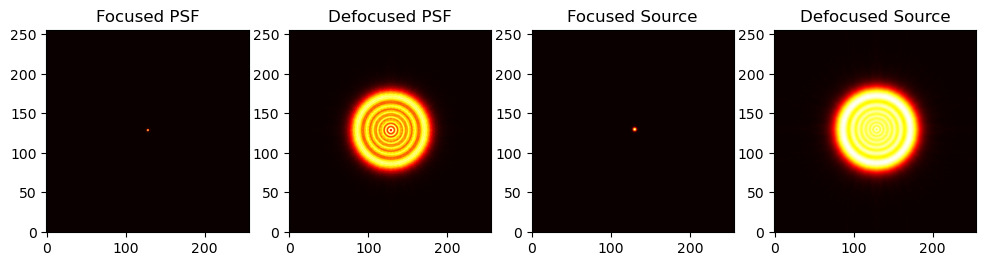

In [24]:
# Plot the PSFs

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(np.log1p(psf_focused), cmap='hot', origin='lower')
axes[0].set_title("Focused PSF")
axes[1].imshow(np.log1p(psf_defocused), cmap='hot', origin='lower')
axes[1].set_title("Defocused PSF")
axes[2].imshow(np.log1p(source_focused), cmap='hot', origin='lower')
axes[2].set_title("Focused Source")
axes[3].imshow(np.log1p(source_defocused), cmap='hot', origin='lower')
axes[3].set_title("Defocused Source")
#plt.savefig("defocus.png", dpi=300, bbox_inches='tight')
plt.show()

# Task 4 

### Additional Aberrations

In addition to defocus, optical systems can suffer from various other aberrations that degrade image quality. Each aberration introduces unique distortions in the Point Spread Function (PSF), affecting the clarity and shape of the image. Using **Zernike polynomials**, we can mathematically represent these aberrations and analyze their effects on the PSF. Here, we focus on three common types: **spherical aberration**, **coma**, and **astigmatism**.

#### Spherical Aberration

Spherical aberration occurs when light rays passing through the edges of the telescope aperture do not converge at the same focal point as those passing through the center. This mismatch causes a blurring effect that worsens as you move away from the optical axis. Spherical aberration is symmetric around the optical axis and results in an image that lacks sharpness, particularly in high-resolution imaging.

In Zernike terms, spherical aberration can be represented by the polynomial $Z_4^0(\rho)$, which describes the radial symmetry of this aberration:

$$
\Phi_{\text{spherical}}(x, y) = c_{\text{spherical}} \cdot Z_4^0(\rho),
$$

where $c_{\text{spherical}}$ is the spherical aberration coefficient, and $Z_4^0(\rho)$ emphasizes radial distortion. The effect of spherical aberration is a symmetric blurring in the PSF, reducing image sharpness across the field of view.

#### Coma

Coma is an aberration that primarily affects off-axis points in the field of view. It causes these points to appear stretched or to have a "comet-like" tail, with the image intensity distributed asymmetrically. Coma occurs when the optical system is not perfectly aligned, or when there is a tilt in the system, resulting in off-axis rays focusing at different points.

Coma is represented by the Zernike polynomial terms with an azimuthal frequency of $m = 1$, specifically  $Z_3^1(\rho, \phi)$ for horizontal coma and $Z_3^{-1}(\rho, \phi)$ for vertical coma:

$$
\Phi_{\text{coma}}(x, y) = c_{\text{coma}} \cdot Z_3^1(\rho, \phi),
$$

where $c_{\text{coma}}$ is the coma aberration coefficient. Coma distorts the PSF by shifting the light distribution towards one side, producing an asymmetrical spread. This type of aberration is particularly problematic in wide-field imaging, where off-axis points are significantly affected.

#### Astigmatism

Astigmatism is an aberration where the focal point differs along two perpendicular axes, causing the image to appear elliptical or stretched. This results from uneven curvature in the optical system, which causes rays in different orientations to focus at different depths. Astigmatism is common in optical systems with cylindrical lenses or in cases where lenses are not perfectly symmetrical.

Astigmatism can be represented using Zernike polynomials with azimuthal frequency $m = 2$, specifically $Z_2^2(\rho, \phi)$ for one orientation of astigmatism (e.g., 45°) and $Z_2^{-2}(\rho, \phi)$ for the orthogonal orientation (e.g., 90°):

$$
\Phi_{\text{astigmatism}}(x, y) = c_{\text{astigmatism}} \cdot Z_2^2(\rho, \phi),
$$

where $c_{\text{astigmatism}}$ is the coefficient representing the strength of the astigmatic distortion. In the PSF, astigmatism introduces an elliptical distortion, which varies with rotation, causing the image to change shape as it moves through focus.

#### Combined Aberrations and Their Impact on the PSF

In practical optical systems, multiple aberrations can be present simultaneously. The overall wavefront distortion can be represented as a linear combination of the Zernike polynomials, with each aberration contributing a term in the polynomial expansion. This combined wavefront aberration $\Phi(x, y)$ is expressed as:

$$
\Phi(x, y) = \sum_{n, m} c_{nm} Z_n^m(\rho, \phi),
$$

where $c_{nm}$ are the coefficients representing the magnitude of each specific aberration. By adjusting these coefficients, we can simulate different aberration scenarios in the PSF and study their individual and combined effects on the image.

Exploring these aberrations provides insights into the limitations of optical systems and highlights the importance of minimizing or correcting aberrations to improve imaging quality. In this task, we examine the effects of various combinations of spherical aberration, coma, and astigmatism on the PSF to understand how each distortion impacts the overall image clarity and fidelity.

### Parameters for Wavefront Deformations

In [25]:
# Generate rho and phi grids for Zernike polynomials

y, x = np.indices((field_size, field_size))
x = x - field_size // 2
y = y - field_size // 2
rho = np.sqrt(x**2 + y**2) / (field_size // 2)
phi = np.arctan2(y, x)
rho[rho > 1] = 0  # Mask values outside the unit circle

### Define Zernike Polynomials

In [26]:
def zernike_defocus(rho, strength):
    return strength * np.sqrt(3) * (2 * rho**2 - 1)  # Defocus (Z_2^0)

def zernike_vertical_coma(rho, phi, strength):
    return strength * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.sin(phi)  # Vertical Coma (Z_3^-1)

def zernike_horizontal_coma(rho, phi, strength):
    return strength * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.cos(phi)  # Horizontal Coma (Z_3^1)

def zernike_spherical_aberration(rho, strength):
    return strength * np.sqrt(5) * (6 * rho**4 - 6 * rho**2 + 1)  # Spherical Aberration (Z_4^0)

def zernike_oblique_astigmatism(rho, phi, strength):
    return strength * np.sqrt(6) * rho**2 * np.sin(2 * phi)  # oblique astigmatism Z_2^-2
    
def zernike_vertical_astigmatism(rho, phi, strength):
    return strength * np.sqrt(6) * rho**2 * np.cos(2 * phi)  # vertical astigmatism Z_2^2

### Strengths for Aberrations

In [27]:
# Define strengths for each Zernike aberration

defocus_strength = 2
coma_strength = 2
spherical_strength = 1
astigmatism_strength = 1

### List of Aberrations

In [28]:
# Define the list of aberrations
aberrations = [
    (zernike_defocus, defocus_strength, "Defocus"),
    (zernike_vertical_coma, coma_strength, "Vertical Coma"),
    (zernike_horizontal_coma, coma_strength, "Horizontal Coma"),
    (zernike_spherical_aberration, spherical_strength, "Spherical Aberration"),
    (zernike_oblique_astigmatism, astigmatism_strength, "Oblique Astigmatism"),
    (zernike_vertical_astigmatism, astigmatism_strength, "Vertical Astigmatism")
]

### Visualize the Aberrations

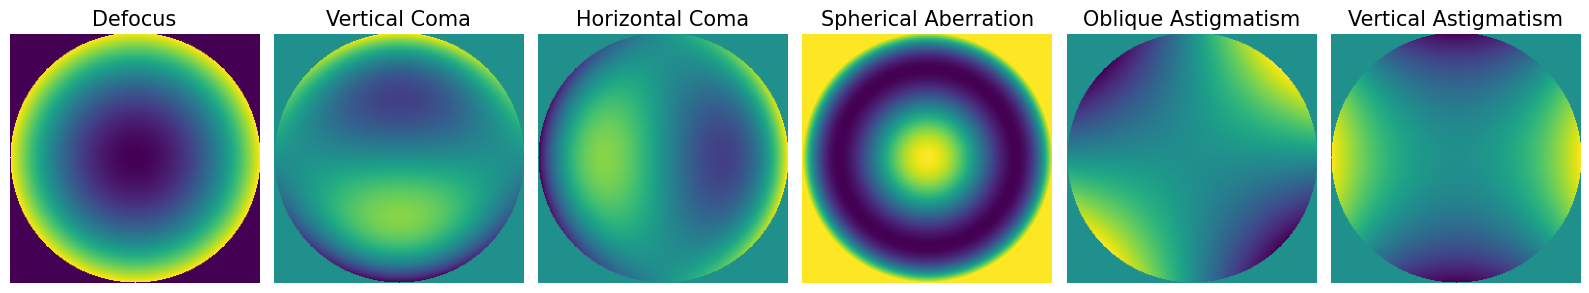

In [29]:
# Plot the phase shifts for each aberration

fig, axes = plt.subplots(1, 6, figsize=(16, 4))
axes = axes.ravel()

for i, (aberration_function, strength, title) in enumerate(aberrations):
    # Check the number of arguments and calculate phase shift
    if aberration_function.__code__.co_argcount == 2:
        phase_shift = aberration_function(rho, strength)
    else:
        phase_shift = aberration_function(rho, phi, strength)
    
    # Visualize the phase shift
    axes[i].imshow(phase_shift, cmap='viridis', origin='lower')
    axes[i].set_title(title, fontsize=15)
    axes[i].axis('off')

plt.tight_layout()
#plt.savefig("zernike.png", dpi=300, bbox_inches='tight')
plt.show()

### Apply Aberrations to PSF

In [30]:
# Apply each Zernike aberration separately

def apply_aberration(aperture, rho, phi, aberration_function, strength):
    if aberration_function.__code__.co_argcount == 2:
        phase_shift = aberration_function(rho, strength)
    else:
        phase_shift = aberration_function(rho, phi, strength)
    phase_shift = np.exp(1j * phase_shift)
    return aperture * phase_shift

### Plot Aberrated PSFs

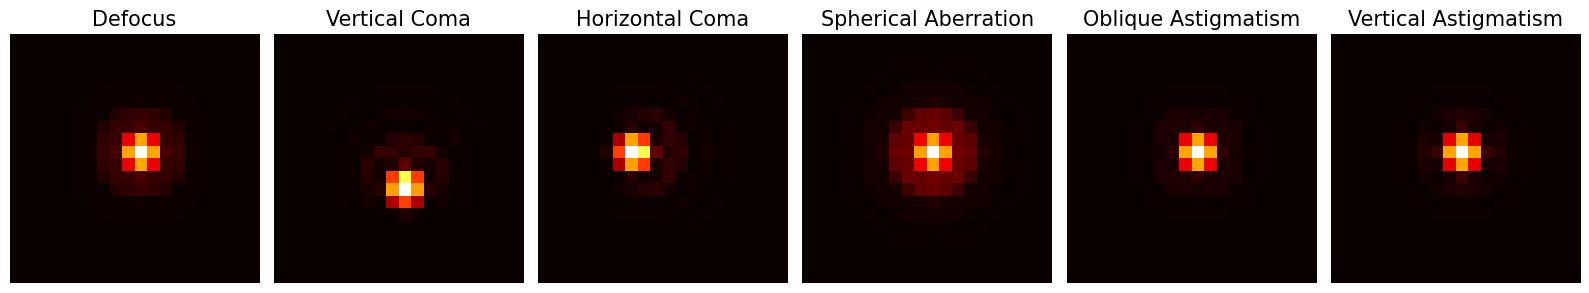

In [31]:
zoom_level = 10  # Number of pixels to show from the center

fig, axes = plt.subplots(1, 6, figsize=(16, 4))

for i, (aberration_function, strength, title) in enumerate(aberrations):
    aberrated_aperture = apply_aberration(aperture_image, rho, phi, aberration_function, strength)
    psf = compute_psf(aberrated_aperture)
    axes[i].imshow(np.log1p(psf), cmap='hot', origin='lower',
                   extent=[-field_size // 2, field_size // 2, -field_size // 2, field_size // 2])
    axes[i].set_xlim(-zoom_level, zoom_level)
    axes[i].set_ylim(-zoom_level, zoom_level)
    axes[i].set_title(title, fontsize=15)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("abbr_psfs.png", dpi=300, bbox_inches='tight')
plt.show()

### Combined Zernike Aberrations

In [32]:
def apply_combined_aberrations(
    aperture_image, rho, phi, defocus_strength, coma_strength, spherical_strength, astigmatism_strength
):
    
# Calculate the combined phase shift using Zernike polynomials """
    phase_shift = (
        zernike_defocus(rho, defocus_strength) +
        zernike_vertical_coma(rho, phi, coma_strength) +
        zernike_horizontal_coma(rho, phi, coma_strength) +
        zernike_spherical_aberration(rho, spherical_strength) +
        zernike_oblique_astigmatism(rho, phi, astigmatism_strength) +
        zernike_vertical_astigmatism(rho, phi, astigmatism_strength)
    )
    
    phase_shift[rho > 1] = 0                             # Mask values outside the unit circle
    phase_shift = np.exp(1j * phase_shift)               # Convert the phase shift to a complex exponential
    aberrated_aperture = aperture_image * phase_shift    # Apply phase shift to aperture and mask
    aberrated_aperture[rho > 1] = 0                      # Ensure values outside the circle are zero

    return aberrated_aperture

### Apply Linear Aberration

In [33]:
# Apply combined aberrations to the aperture and source

aperture_aberrated = apply_combined_aberrations(
    aperture_image, rho, phi, defocus_strength, coma_strength, spherical_strength, astigmatism_strength
)

aberrated_psf = compute_psf(aperture_aberrated)
source_aberrated = convolve2d(source_image, aberrated_psf, mode='same', boundary='wrap')

### Vizualization of Aberrated images

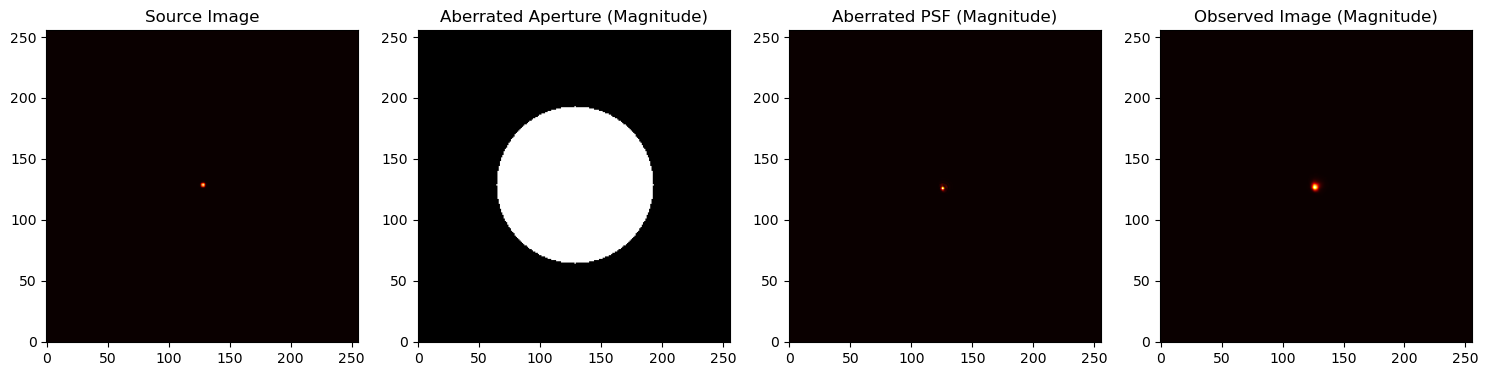

In [34]:
# Plotting source, aberrated aperture, aberrated psf and aberrated source

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot Source
axes[0].imshow(source_image, cmap='hot', origin='lower')
axes[0].set_title("Source Image", fontsize=12)
axes[0].axis('on')

# Plot aberrated aperture
axes[1].imshow(np.abs(aperture_aberrated), cmap='gray', origin='lower')
axes[1].set_title("Aberrated Aperture (Magnitude)", fontsize=12)
axes[1].axis('on')

# Plot aberrated PSF
axes[2].imshow(np.abs(aberrated_psf), cmap='hot', origin='lower')
axes[2].set_title("Aberrated PSF (Magnitude)", fontsize=12)
axes[2].axis('on')

# Plot convolved (aberrated) image
axes[3].imshow(np.log1p(np.abs(source_aberrated)), cmap='hot', origin='lower')
axes[3].set_title("Observed Image (Magnitude)", fontsize=12)
axes[3].axis('on')

plt.tight_layout()
#plt.savefig("linear_abbr.png", dpi=300, bbox_inches='tight')
plt.show()

### Zooming Aberrated images

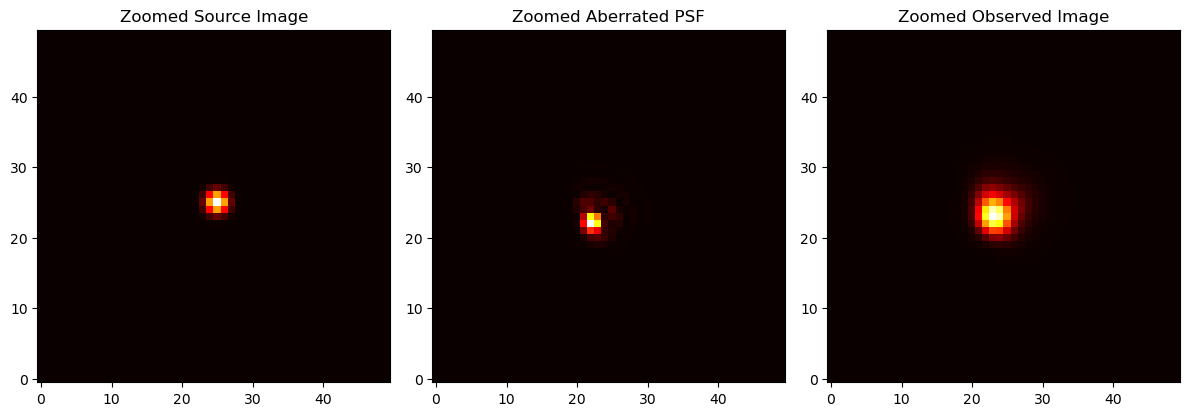

In [35]:
zoom_factor = 25                        # Adjust this as needed
center = source_image.shape[0] // 2      # Assume a square image, take the center

""" Plot in a row: zoomed source_image, magnitude of zoomed aberrated_psf, and zoomed source_aberrated"""

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(source_image[center - zoom_factor:center + zoom_factor,
                            center - zoom_factor:center + zoom_factor], cmap='hot', origin='lower')
axes[0].set_title("Zoomed Source Image", fontsize=12)
axes[0].axis('on')
axes[1].imshow(np.abs(aberrated_psf)[center - zoom_factor:center + zoom_factor,
                                     center - zoom_factor:center + zoom_factor], cmap='hot', origin='lower')
axes[1].set_title("Zoomed Aberrated PSF", fontsize=12)
axes[1].axis('on')
axes[2].imshow(np.log1p(np.abs(source_aberrated))[center - zoom_factor:center + zoom_factor,
                                                  center - zoom_factor:center + zoom_factor], cmap='hot', origin='lower')
axes[2].set_title("Zoomed Observed Image", fontsize=12)
axes[2].axis('on')

plt.tight_layout()
#plt.savefig("linear_abbr_zoom.png", dpi=300, bbox_inches='tight')
plt.show()

# Task 5

### Effects of Central Obscuration on PSF

In many telescopes, especially reflectors, a **central obstruction** is introduced by secondary mirrors or support structures. This central obscuration blocks part of the incoming light, altering the diffraction pattern and resulting in a modified PSF. 

The effect of obscuration is modeled by modifying the aperture function A(x, y) to account for the obstructed region. If the radius of the telescope aperture is R and the radius of the central obstruction is $r_{\text{obs}}$, then the modified aperture function is given by:

$$
A_{\text{obs}}(x, y) = 
\begin{cases} 
1, & \text{if } r_{\text{obs}} \leq \sqrt{x^2 + y^2} \leq R \\ 
0, & \text{otherwise}
\end{cases}
$$

This central obscuration affects the PSF by:
- Increasing the prominence of side lobes in the Airy pattern.
- Reducing the intensity of the central peak, which slightly reduces image contrast.

By comparing the PSF with and without central obscuration, we can observe the trade-offs in image quality due to telescope design constraints, providing insights into the impact of obscuration on resolution and contrast.

### Define Central Obscuration

In [36]:
# Define a function to create an aperture with central obscuration
def create_aperture_with_obscuration(obstruction_radius):
    # Use the pre-defined field size and aperture
    y, x = np.indices((field_size, field_size))
    x -= field_size // 2
    y -= field_size // 2

    # Create the central obscuration mask
    obstruction = (x**2 + y**2 <= (radius * obstruction_radius)**2).astype(float)

    # Subtract the obstruction from the existing aperture
    obscured_aperture = aperture_aberrated - obstruction
    obscured_aperture[obscured_aperture < 0] = 0  # Ensure no negative values

    return obscured_aperture

### Apply Obscuration to PSF

In [37]:
# Compute PSF without obstruction
psf_no_obscuration = aberrated_psf

# Compute PSF with 0.1 obstruction
aperture_0_1 = create_aperture_with_obscuration(0.1)
psf_0_1_obscuration = compute_psf(aperture_0_1)

# Compute PSF with 0.5 obstruction
aperture_0_5 = create_aperture_with_obscuration(0.5)
psf_0_5_obscuration = compute_psf(aperture_0_5)

### Plot Obscurated PSFs

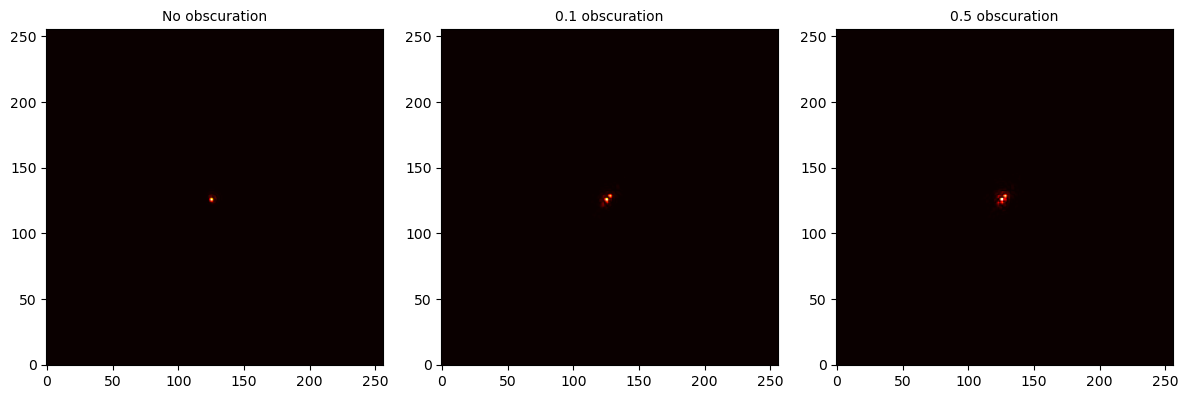

In [38]:
# Plot the PSFs side by side

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# No obstruction
axes[0].imshow(psf_no_obscuration, cmap='hot', origin='lower')
axes[0].set_title("No obscuration", fontsize=10)
axes[0].axis('on')

# 0.1 obstruction
axes[1].imshow(psf_0_1_obscuration, cmap='hot', origin='lower')
axes[1].set_title("0.1 obscuration", fontsize=10)
axes[1].axis('on')

# 0.5 obstruction
axes[2].imshow(psf_0_5_obscuration, cmap='hot', origin='lower')
axes[2].set_title("0.5 obscuration", fontsize=10)
axes[2].axis('on')

plt.tight_layout()
#plt.savefig("obbsc_psf.png", dpi=300, bbox_inches='tight')
plt.show()

### Apply Obscuration to Source

In [39]:
# Apply obscured psf to source function

source_no_obscuration = source_aberrated
source_0_1_obscuration = convolve2d(source_image, psf_0_1_obscuration, mode='same', boundary='wrap')
source_0_5_obscuration = convolve2d(source_image, psf_0_5_obscuration, mode='same', boundary='wrap')

### Plot Obscurated Source

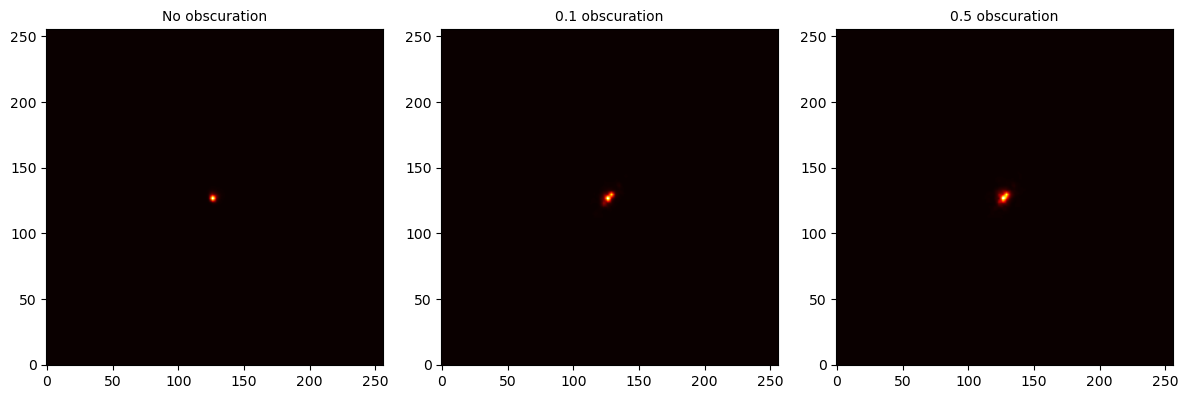

In [40]:
# Plot the convolved images side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot for no obstruction
axes[0].imshow(source_no_obscuration, cmap='hot', origin='lower')
axes[0].set_title("No obscuration", fontsize=10)
axes[0].axis('on')

# Plot for 0.1 obstruction
axes[1].imshow(source_0_1_obscuration, cmap='hot', origin='lower')
axes[1].set_title("0.1 obscuration", fontsize=10)
axes[1].axis('on')

# Plot for 0.5 obstruction
axes[2].imshow(source_0_5_obscuration, cmap='hot', origin='lower')
axes[2].set_title("0.5 obscuration", fontsize=10)
axes[2].axis('on')

plt.tight_layout()
#plt.savefig("obbsc_source.png", dpi=300, bbox_inches='tight')
plt.show()

### Zoom Obscurated Sources

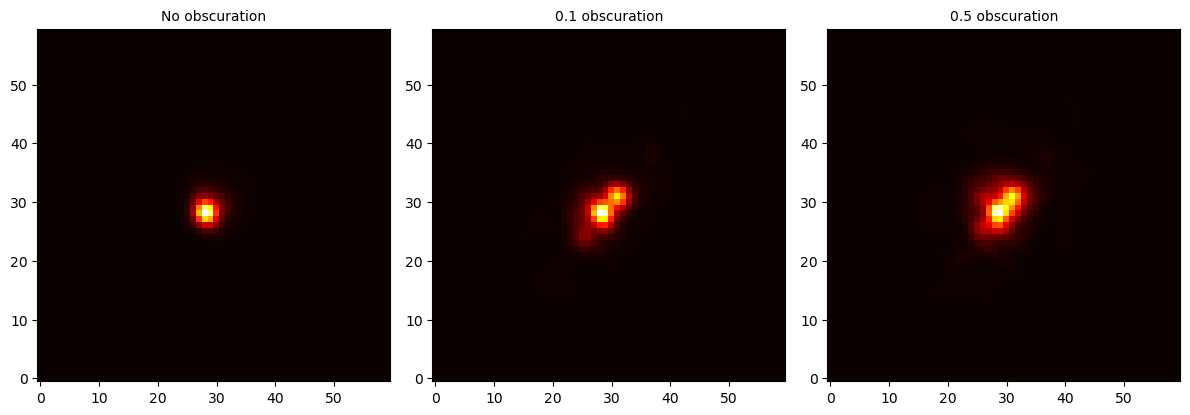

In [41]:
# Define the zoom factor for central region focus
zoom_factor = 30  # Adjust to zoom in more or less

# Compute the central indices
center = source_image.shape[0] // 2

# Extract zoomed-in regions
source_no_obscuration_zoomed = source_no_obscuration[
    center - zoom_factor:center + zoom_factor,
    center - zoom_factor:center + zoom_factor
]
source_0_1_obscuration_zoomed = source_0_1_obscuration[
    center - zoom_factor:center + zoom_factor,
    center - zoom_factor:center + zoom_factor
]
source_0_5_obscuration_zoomed = source_0_5_obscuration[
    center - zoom_factor:center + zoom_factor,
    center - zoom_factor:center + zoom_factor
]

# Plot the zoomed-in images side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot zoomed images for each obstruction level
titles = ["No obscuration", "0.1 obscuration", "0.5 obscuration"]
images = [
    source_no_obscuration_zoomed,
    source_0_1_obscuration_zoomed,
    source_0_5_obscuration_zoomed,
]

for i, (image, title) in enumerate(zip(images, titles)):
    axes[i].imshow(image, cmap='hot', origin='lower')
    axes[i].set_title(title, fontsize=10)
    axes[i].axis('on')

plt.tight_layout()
#plt.savefig("obbsc_source_zoom.png", dpi=300, bbox_inches='tight')
plt.show()

## Summary and Analysis

After completing all these tasks, I gained a clearer understanding of how different factors affect the clarity and quality of images in telescopes, specifically through the concept of the Point Spread Function (PSF). Here’s a breakdown of my learning from each task:

---

1. **Aperture Shapes and Sizes**: I learned that the shape and size of the telescope’s aperture directly affect the PSF and the image quality. For instance, larger circular apertures give sharper images with a bright central point and narrower surrounding rings. When we used different shapes like squares, hexagons, and triangles, each shape added its own unique pattern of diffraction. This experiment made it clear how important the design of the telescope’s aperture is in determining how clearly we see objects in space.

2. **Impact of Aberrations**: Adding different types of optical aberrations—such as defocus, coma, astigmatism, and spherical aberration—showed me how imperfections in the optical system can distort images. Each aberration type had a distinct effect:
   - **Defocus** made the PSF blurrier, as if the telescope wasn’t focused properly.
   - **Coma** created a comet-like tail, making the PSF appear stretched in one direction.
   - **Astigmatism** distorted the PSF in specific directions, almost like an uneven stretching.
   - **Spherical Aberration** diffused the PSF more evenly, lowering the sharpness and contrast of the image.
   
   This task highlighted how even minor imperfections in telescope lenses or mirrors can significantly impact image quality.

3. **Examining Central Obstructions**: In the final step, I simulated the effect of central obstructions (like the secondary mirrors found in many telescope designs) by adding obstructions of different sizes (0.1 and 0.5 relative to the aperture size). The PSF for the unobstructed aperture was sharp, with a bright central peak. Adding a small obstruction (0.1) caused minor alterations, but with a larger obstruction (0.5), the central brightness dropped noticeably, and the surrounding rings became more pronounced. This helped me understand why designers aim to minimize central obstructions to preserve image quality, as large obstructions can lead to reduced sharpness and increased diffraction effects.

   
---

**Overall Insight**: Through these tasks, I gained hands-on experience with how the PSF is affected by various physical and optical characteristics of a telescope. Each factor—aperture shape, optical aberrations, and obstructions—has a distinct impact on the final image quality. This exercise gave me a foundational understanding of the PSF and the importance of optimizing telescope design to achieve the clearest and most accurate images. Working through these steps has been invaluable in seeing how theory translates into practical image quality considerations in real telescopes.

### References

1. Hecht, E. (2017). *Optics* (5th ed.). Pearson Education Inc., San Francisco, CA.

2. Goodman, J. W. (1996). *Introduction to Fourier Optics* (2nd ed.). McGraw-Hill.

3. Born, M., & Wolf, E. (1999). *Principles of Optics* (7th ed.). Cambridge University Press.

4. Bracewell, R. N. (2000). *The Fourier Transform and Its Applications* (3rd ed.). McGraw-Hill.

5. Smith, G. (n.d.). Zernike Polynomials. *Arizona Optical Sciences Center*. Retrieved from [https://webs.optics.arizona.edu/gsmith/Zernike.html](https://webs.optics.arizona.edu/gsmith/Zernike.html)

6. Wyant, J. C. (n.d.). Miscellaneous Neat Graphics on Zernike Polynomials. *Arizona Optical Sciences Center*. Retrieved from [https://wp.optics.arizona.edu/jcwyant/miscellaneous/neat-graphics/zernike-polynomials/](https://wp.optics.arizona.edu/jcwyant/miscellaneous/neat-graphics/zernike-polynomials/)

7. Mahajan, V. N. (1994). *Aberration Theory Made Simple* (Vol. TT6). SPIE Press.

8. Ilić, D. *Lecture Notes on Optical Aberrations and Zernike Polynomials*.